In [12]:
import qmcpy as qp
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
import cProfile
import pstats

In [13]:
def natural(n, num_ports, seed=None):
    l = qp.Lattice(dimension=n, seed=seed,order="natural" ,is_parallel=True)
    points = l.gen_samples(num_ports) 
    return points
def natural_process(n, num_ports, seed=None):
    l = qp.Lattice(dimension=n, seed=seed,order="natural_process")
    points = l.gen_samples(num_ports) 
    return points
def mps(n, num_ports, seed=None):
    l = qp.Lattice(dimension=n, seed=seed,order="mps" ,is_parallel=True)
    points = l.gen_samples(num_ports) 
    return points
def mps_process(n, num_ports, seed=None):
    l = qp.Lattice(dimension=n, seed=seed,order="mps_process",is_parallel=True)
    points = l.gen_samples(num_ports) 
    return points
def linear(n, num_ports, seed=None):
    l = qp.Lattice(dimension=n, seed=seed,order="linear" ,is_parallel=True)
    points = l.gen_samples(num_ports) 
    return points
def linear_process(n, num_ports, seed=None):
    l = qp.Lattice(dimension=n, seed=seed,order="linear_process")
    points = l.gen_samples(num_ports) 
    return points

In [14]:
trials = 3
d_list = [50,100,200,400,800,1600]
n = 14
data = {'index':d_list}
frame = pd.DataFrame(data)
frame = frame.set_index('index')
names = set()

#list contiants the function and a string of its name
run_list = [(natural, "natural"),(natural_process,"natural process"),(linear, "linear"),(linear_process,"linear process"),(mps,"mps"),(mps_process,"mps process")]

for method,method_name in run_list:

    name = method_name.split(" ")

    names.add(name[0])

    times = []
    
    for d in d_list:
        profiler = cProfile.Profile()
        profiler.enable()
        for _ in range(trials):
            method(d, 2 ** n)
        profiler.disable()
        
        stats = pstats.Stats(profiler)
            
        process_time = stats.total_tt

        #print(f'Process time {process_time} method name {method_name}')
        times.append(process_time)
        
    frame[method_name] = times        


names = list(names)     
#print(frame)   


In [15]:
compare_methods= [('natural', 'natural process'),('mps', 'mps process'),('linear', 'linear process')]


def speed_up_cal(data_frame, compare_list, dimension_list):
    result = []
    for seq,pro in compare_list:
        result = []
        for x in dimension_list:
            a = data_frame[seq][x]
            b = data_frame[pro][x]
            result.append(a/b)
        data_frame[seq + " speed-up"] = result


speed_up_cal(frame, compare_methods, d_list)

#print(frame)





[0.02712276 0.04321336 0.07751797 0.14043485 0.23817819 0.38192768]


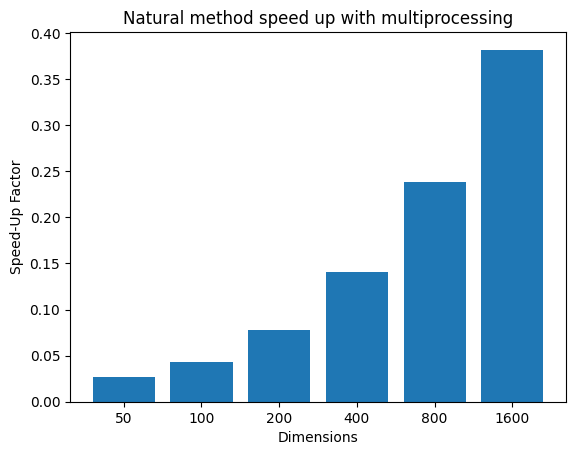

[1.00213924 1.01264045 1.0345526  0.998451   1.01240779 0.99935277]


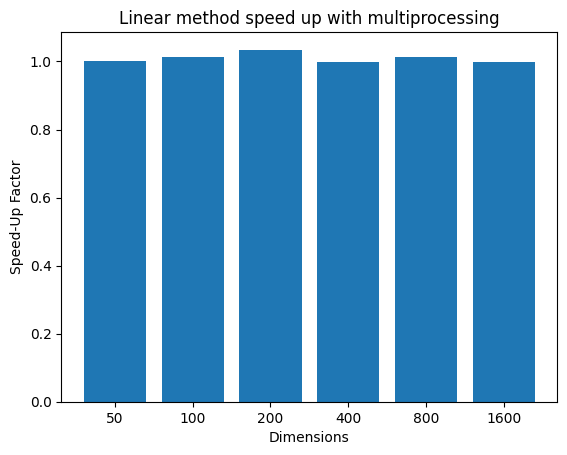

[0.08990335 0.0958026  0.12576544 0.17561381 0.30490844 0.41253253]


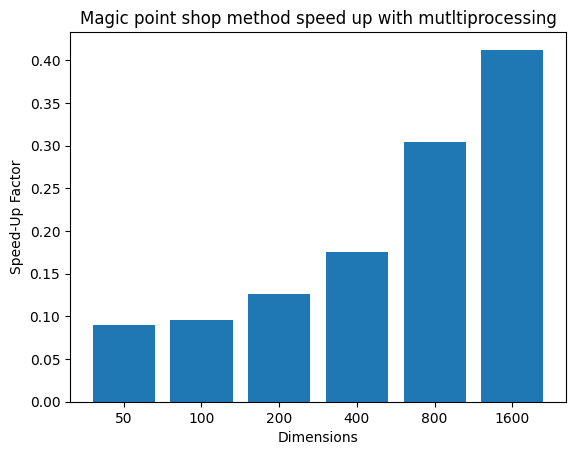

In [16]:

x = lambda array: [str(x) for x in array]

y_axis = frame["natural speed-up"].to_numpy()
print(y_axis)
x_axis = x(d_list)
plt.bar(x_axis, y_axis)
plt.xlabel('Dimensions')
plt.ylabel('Speed-Up Factor')
plt.title('Natural method speed up with multiprocessing')
#plt.xticks(np.arange(1,len(d_list),2))
plt.show()


y_axis = frame["linear speed-up"].to_numpy()
print(y_axis)
x_axis = x(d_list)
plt.bar(x_axis, y_axis)
plt.xlabel('Dimensions')
plt.ylabel('Speed-Up Factor')
plt.title('Linear method speed up with multiprocessing')
#plt.xticks(np.arange(1,len(d_list),2))
plt.show()

y_axis = frame["mps speed-up"].to_numpy()
print(y_axis)
x_axis = x(d_list)
plt.bar(x_axis, y_axis)
plt.xlabel('Dimensions')
plt.ylabel('Speed-Up Factor')
plt.title('Magic point shop method speed up with mutltiprocessing')
#plt.xticks(np.arange(1,len(d_list),2))
plt.show()

In [17]:
p_list = [2**x for x in range(5,15)]
dimension = 1000
records = {'index':p_list}
frame2 = pd.DataFrame(records)
frame2 = frame2.set_index('index')
names = set()

for method, method_name in run_list:
    name = method_name.split(" ")

    names.add(name[0])


    times = []
    
    for p in p_list:
        profiler = cProfile.Profile()
        profiler.enable()
        for _ in range(trials):
            method(d, p)
        profiler.disable()
    
        stats = pstats.Stats(profiler)
        
        process_time = stats.total_tt

        # print(f'Process time {process_time} method name {method_name}')
        times.append(process_time)
    
    frame2[method_name] = times        


names = list(names)  
speed_up_cal(frame2,compare_methods, p_list)   

[0.00705663 0.00720058 0.01035843 0.01712451 0.02730919 0.04849256
 0.08853577 0.1513789  0.24167345 0.37336823]


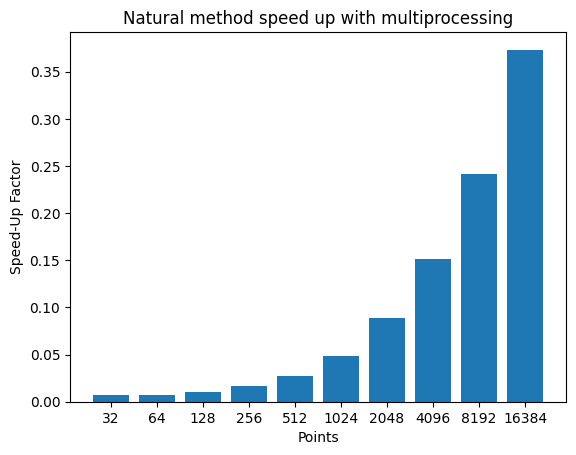

[1.1441529  1.01973619 0.99679943 0.9989964  1.0056559  1.00201454
 1.00087275 1.00292315 0.99669215 0.99754715]


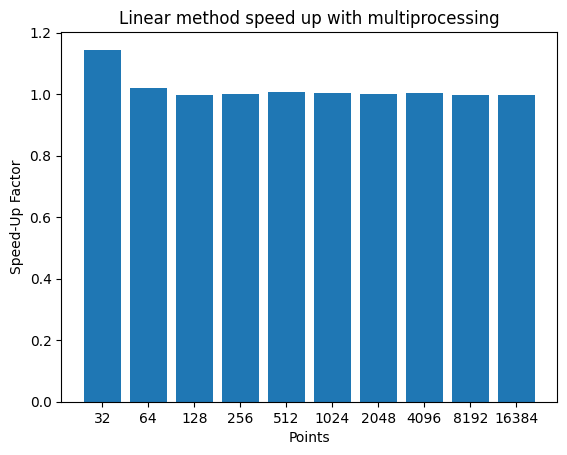

[0.00518956 0.00590331 0.00988275 0.0165553  0.02957383 0.05134752
 0.09039708 0.1587713  0.25874142 0.38718301]


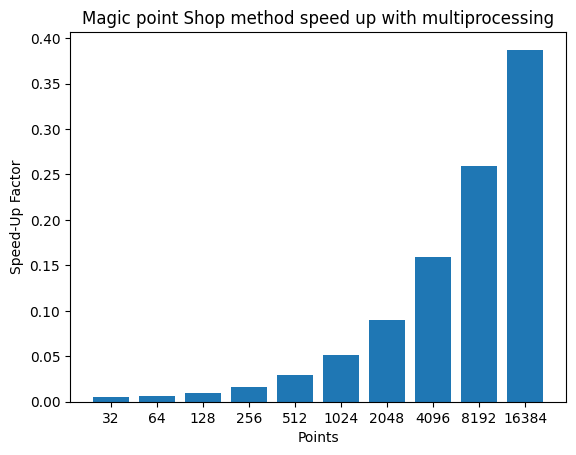

In [18]:
x = lambda array: [str(x) for x in array]

y_axis = frame2["natural speed-up"].to_numpy()
print(y_axis)
x_axis = x(p_list)
plt.bar(x_axis, y_axis)
plt.xlabel('Points')
plt.ylabel('Speed-Up Factor')
plt.title('NONE')
plt.title('Natural method speed up with multiprocessing')
plt.show()

y_axis = frame2["linear speed-up"].to_numpy()
print(y_axis)
x_axis = x(p_list)
plt.bar(x_axis, y_axis)
plt.xlabel('Points')
plt.ylabel('Speed-Up Factor')
plt.title('Linear method speed up with multiprocessing')
plt.show()

y_axis = frame2["mps speed-up"].to_numpy()
print(y_axis)
x_axis = x(p_list)
plt.bar(x_axis, y_axis)
plt.xlabel('Points')
plt.ylabel('Speed-Up Factor')
plt.title('Magic point Shop method speed up with multiprocessing')
plt.show()